In [1]:
from typing import Callable, List, Any

import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp
from scipy.optimize import root_scalar
import pylab as pl

from mpl_toolkits.mplot3d import Axes3D

## Atractor de Lorentz

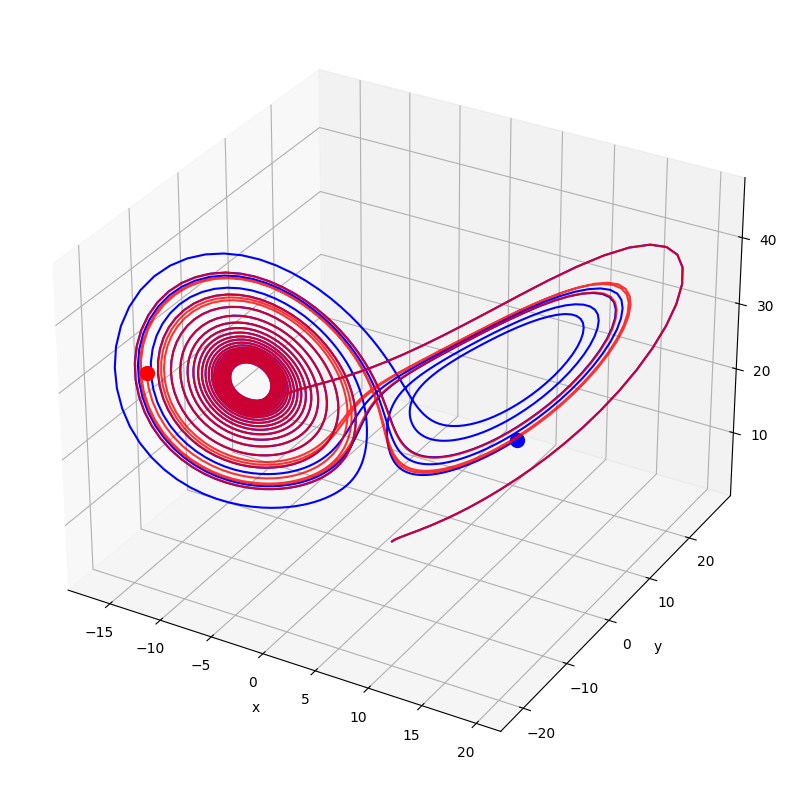

In [2]:
rho = 28.0
sigma = 10.0
beta = 8.0 / 3.0

def f_lorentz_generator(rho, sigma, beta):
    
    def init(t, state):
        x, y, z = state  # Desempaqueta el vector de estado
        return sigma * (y - x), x * (rho - z) - y, x * y - beta * z  # Derivadas
        
    return init

f_lorentz = f_lorentz_generator(rho, sigma, beta)

state0 = [1.0, 1.0, 1.0]
T = 20
t_span = [0, T]
t_values = np.linspace(t_span[0], t_span[1], T * 100)

result = solve_ivp(f_lorentz, t_span, state0, dense_output=True, t_eval=t_values)
states = result.y.T 

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
p1 = ax.plot(states[:, 0], states[:, 1], states[:, 2], color="blue")
ax.plot(states[-1, 0], states[-1, 1], states[-1, 2], color="blue",  marker="o", markersize=10)

# plt.show()

state0 = [1.0, 1.0, 1.010] 

result2 = solve_ivp(f_lorentz, t_span, state0, dense_output=True, t_eval=t_values)
states2 = result2.y.T 

ax.plot(states2[:, 0], states2[:, 1], states2[:, 2], color="r", alpha=0.8)
ax.plot(states2[-1, 0], states2[-1, 1], states2[-1, 2], color="r", marker="o", markersize=10)

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.show()

## Sección de Poincaré

In [3]:
def poincare_section_grid(function, t_span, n_points=100):

    t_values = np.linspace(t_span[0], t_span[1], n_points)
    t_roots = []
    for i in range(n_points - 1):
        root = None
        try:
            root_result = root_scalar(function, method="bisect", bracket=[t_values[i], t_values[i+1]])
            converged = root_result.converged
            root = root_result.root
        except ValueError:
            converged = False
        if converged:
            t_roots.append(root)
    return np.array(t_roots)

def poincare_section_generator(result, poincare_map):

    def init(t):
        return poincare_map(result.sol(t))
    return init

In [4]:
def poincare_map(states):
    return states[0]
    
state0_0 = [1.0, 1.0, 1.0]
state0_1 = [1.001, 1.0, 1.0] 

T = 40
t_span = [0, T]
t_values = np.linspace(t_span[0], t_span[1], T * 100)

result = solve_ivp(f_lorentz, t_span, state0_0, dense_output=True)
result2 = solve_ivp(f_lorentz, t_span, state0_1, dense_output=True, t_eval=t_values) 

root_points_00 = poincare_section_grid(poincare_section_generator(result, poincare_map), t_span, n_points=T * 100)
root_points_01 = poincare_section_grid(poincare_section_generator(result2, poincare_map), t_span, n_points=T * 100)

root_points_00

array([ 0.51298646, 14.17828829, 14.95354847, 15.74609354, 16.51259702,
       18.0835094 , 20.36845722, 22.63899511, 24.18033758, 24.94841309,
       27.43138249, 32.97882691, 34.50835281, 35.27987799, 36.09752435,
       36.86846892, 39.12347124])

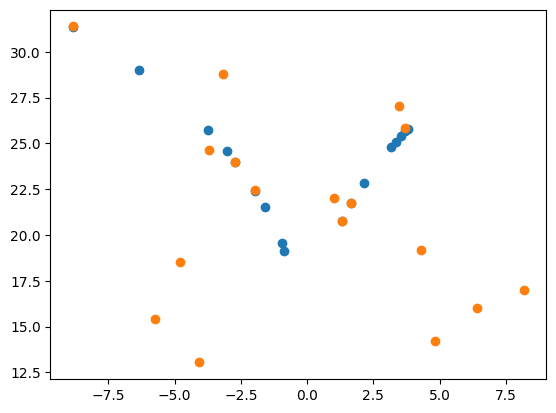

In [5]:
solution_0 = result.sol(root_points_00)
plt.scatter(solution_0[1, :], solution_0[2,:])

solution_01 = result.sol(root_points_01)
plt.scatter(solution_01[1, :], solution_01[2,:])

#### Resolviendo el ODE para cada sub intervalo

In [6]:
def poincare_section_grid_ode(function_ode, poincare_map, t_span, x0, n_points = None):
    t_values = None
    if n_points:
        t_values = np.linspace(t_span[0], t_span[1], n_points)
    result_general = solve_ivp(function_ode, t_span, x0, t_eval=t_values)
    t_values = result_general.t
    x0_array = result_general.y
    t_roots = []
    for i in range(t_values.size - 1):
        result = solve_ivp(function_ode, [t_values[i], t_values[i+1]], x0_array[:,i], dense_output=True)
        poincare_section = poincare_section_generator(result, poincare_map)
        root = None
        try:
            root_result = root_scalar(poincare_section, method="bisect", bracket=[t_values[i], t_values[i+1]])
            converged = root_result.converged
            root = root_result.root
        except ValueError:
            converged = False
        if converged:
            t_roots.append(root)
    return np.array(t_roots)

In [7]:
root_points_10 = poincare_section_grid_ode(f_lorentz, poincare_map, t_span, state0_0, T*100)
root_points_10

array([ 0.51298847, 14.17827841, 14.9535565 , 15.74609562, 16.51259833,
       18.08351033, 20.3684573 , 22.63900017, 24.18032741, 24.94841509,
       27.43138729, 32.97882631, 34.50833572, 35.27987956, 36.09752305,
       36.86848209, 39.12347376])

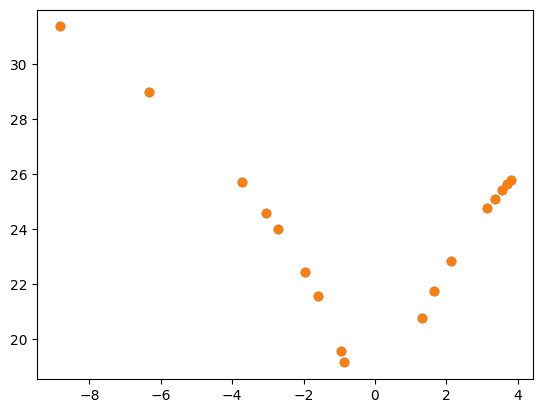

In [8]:
solution_0 = result.sol(root_points_00)
plt.scatter(solution_0[1, :], solution_0[2,:])

solution_10 = result.sol(root_points_10)
plt.scatter(solution_10[1, :], solution_10[2,:])

## Ejemplos de secciones de Poincaré

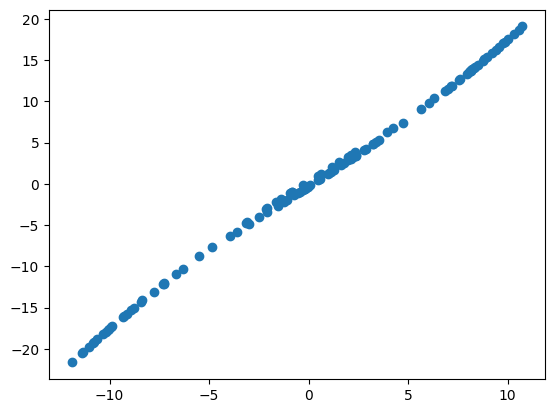

In [101]:
z_plane = 16

def poincare_map(states):
    return states[2] - z_plane

    
state0 = [8.0, 9.0, 25.0]

T = 80
t_span = [0, T]
t_values = np.linspace(t_span[0], t_span[1], T * 100)

result = solve_ivp(f_lorentz, t_span, state0, dense_output=True, t_eval=t_values)

root_points = poincare_section_grid_ode(f_lorentz, poincare_map, t_span, state0, T*100)

solution = result.sol(root_points)
plt.scatter(solution[0, :], solution[1,:])

Text(0.5, 0, 'z')

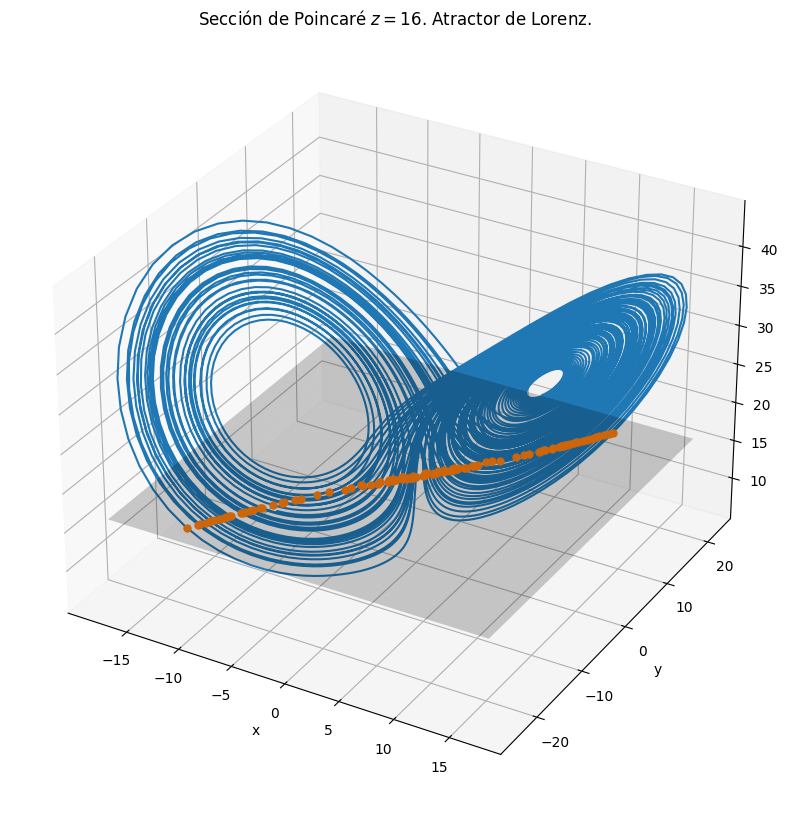

In [102]:
states = result.y.T
solution = result.sol(root_points)
xx, yy = np.meshgrid(
    np.linspace(states[:, 0].min(), states[:, 0].max(), 1000), 
    np.linspace(states[:, 1].min(), states[:, 1].max(), 1000)    
)
z = np.ones(xx.shape) * z_plane

# plot the plane

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
ax.plot(states[:, 0], states[:, 1], states[:, 2])
ax.plot_surface(xx, yy, z, alpha=0.2, color="black")
ax.plot(solution[0, :], solution[1, :], solution[2, :],  marker="o", markersize=5, lw=0)

ax.set_title(f"Sección de Poincaré $z={z_plane}$. Atractor de Lorenz.")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
# plt.show()

In [36]:
limits_plot = ax.get_xlim(), ax.get_ylim(), ax.get_zlim()

### Save Gif

In [49]:
import os
import glob
from PIL import Image
import IPython.display as IPdisplay

In [96]:
save_folder = "lorenz_system/"
state0 = [8.0, 9.0, 25.0]
T = 80

z_plane = 20
t_span = [0, T]

def poincare_map(states):
    return states[2] - z_plane

root_points = poincare_section_grid_ode(f_lorentz, poincare_map, t_span, state0, T*100)

def plot_lorenz_system(f_lorentz, t_0, t_1, x0, folder, z_plane, root_points = None):
    t_span = [t_0, t_1]
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(projection='3d')
    ax.set_xlim(limits_plot[0])
    ax.set_ylim(limits_plot[1])
    ax.set_zlim(limits_plot[2])
    
    if t_1 > t_0:
        t_values = np.linspace(t_span[0], t_span[1], (t_1-t_0) * 100)
        result = solve_ivp(f_lorentz, t_span, x0, dense_output=True, t_eval=t_values)
        states = result.y.T
        xx, yy = np.meshgrid(
            np.linspace(states[:, 0].min(), states[:, 0].max(), 1000), 
            np.linspace(states[:, 1].min(), states[:, 1].max(), 1000)    
        )
        z = np.ones(xx.shape) * z_plane
        ax.plot(states[:, 0], states[:, 1], states[:, 2])
    ax.set_title(f"Sistema del atractor de Lorenz. Plano z = {z_plane}.")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")
    plt.savefig(os.path.join(folder, f"lorenz_system_{t_0}_{t_1}.png"))

    if isinstance(root_points, np.ndarray):
        z = np.ones(xx.shape) * z_plane
        solution = result.sol(root_points)
        ax.plot_surface(xx, yy, z, alpha=0.2, color="black")
        ax.plot(solution[0, :], solution[1, :], solution[2, :],  marker="o", markersize=5, lw=0)
        plt.savefig(os.path.join(folder, f"lorenz_system_pm_{t_0}_{t_1}.png"))


if os.path.exists(save_folder):
    for file in os.scandir(save_folder):
        os.remove(os.path.join(save_folder, file.name))
else:
    os.mkdir(save_folder)


for t in range(T+1):
    plot_lorenz_system(f_lorentz, 0, t, state0, save_folder,z_plane, None)
    plt.close()

plot_lorenz_system(f_lorentz, 0, t, state0, save_folder, z_plane, root_points)
plt.close()

In [112]:
# create a tuple of display durations, one for each frame
first_last = 100 #show the first and last frames for 100 ms
standard_duration = 5 #show all other frames for 5 ms

# load all the static images into a list
images = [Image.open(image) for image in glob.glob('{}/*.png'.format(save_folder))]
durations = [first_last] + [standard_duration] * (len(images) - 2) + [first_last]

gif_filepath = "animated-lorenz-attractor.gif"

# save as an animated gif
gif = images[0]
#gif.info['duration'] = durations #ms per frame
# gif.info['loop'] = 3 #how many times to loop (0=infinite)
gif.save(fp=gif_filepath, format='gif', save_all=True, append_images=images[1:], durations=durations)

IPdisplay.Image(url=gif_filepath)

In [125]:
save_folder_pm = "lorenz_system_pm/"
state0 = [8.0, 9.0, 25.0]
T = 80

t_span = [0, T]


def poincare_map_generator_zplane(z_plane):
    
    def poincare_map(states):
        return states[2] - z_plane

    return poincare_map



def plot_lorenz_system_pm(f_lorentz, t_0, t_1, x0, folder, z_plane):
    t_span = [t_0, t_1]
    root_points = poincare_section_grid_ode(f_lorentz, poincare_map_generator_zplane(z_plane), t_span, x0, (t_1 - t_0)*100)
    solution = result.sol(root_points)
    plt.scatter(solution[0, :], solution[1,:])
    plt.title(f"Sección de Poincaré z={z_plane}")
    plt.savefig(os.path.join(folder, f"lorenz_system_ppoincare_z_{z_plane}.png"))
    plt.close()

if os.path.exists(save_folder):
    for file in os.scandir(save_folder):
        os.remove(os.path.join(save_folder, file.name))
else:
    os.mkdir(save_folder)


for z_plane in range(16, 41):
    plot_lorenz_system_pm(f_lorentz, 0, T, state0, save_folder_pm,z_plane)
    plt.close()

print("Todas las imagenes se han guardado.")

Todas las imagenes se han guardado.


In [126]:
# create a tuple of display durations, one for each frame
first_last = 100 #show the first and last frames for 100 ms
standard_duration = 5 #show all other frames for 5 ms

# load all the static images into a list
images = [Image.open(image) for image in glob.glob('{}/*.png'.format(save_folder_pm))]
durations = [first_last] + [standard_duration] * (len(images) - 2) + [first_last]

gif_filepath = "animated-lorenz-attractor-poincare.gif"

# save as an animated gif
gif = images[0]
#gif.info['duration'] = durations #ms per frame
gif.info['loop'] = 2 #how many times to loop (0=infinite)
gif.save(fp=gif_filepath, format='gif', save_all=True, append_images=images[1:], durations=durations)

IPdisplay.Image(url=gif_filepath)

In [123]:
save_folder_all = "lorenz_system_all/"
state0 = [8.0, 9.0, 25.0]
T = 80

t_span = [0, T]

def poincare_map(states):
    return states[2] - z_plane


def plot_lorenz_system_all(states, folder, z_plane, root_points = None):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(projection='3d')
    ax.set_xlim(limits_plot[0])
    ax.set_ylim(limits_plot[1])
    ax.set_zlim(limits_plot[2])
            
    xx, yy = np.meshgrid(
        np.linspace(states[:, 0].min(), states[:, 0].max(), 1000), 
        np.linspace(states[:, 1].min(), states[:, 1].max(), 1000)    
    )
    ax.plot(states[:, 0], states[:, 1], states[:, 2])
    ax.set_title(f"Sistema del atractor de Lorenz. Plano z = {z_plane}.")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")

    z = np.ones(xx.shape) * z_plane
    solution = result.sol(root_points)
    ax.plot_surface(xx, yy, z, alpha=0.2, color="black")
    ax.plot(solution[0, :], solution[1, :], solution[2, :],  marker="o", markersize=5, lw=0)
    plt.savefig(os.path.join(folder, f"lorenz_system_pm_z_{z_plane}.png"))


if os.path.exists(save_folder_all):
    for file in os.scandir(save_folder_all):
        os.remove(os.path.join(save_folder_all, file.name))
else:
    os.mkdir(save_folder_all)


t_values = np.linspace(0, T, T * 100)
result = solve_ivp(f_lorentz, t_span, state0, dense_output=True, t_eval=t_values)
states = result.y.T
for z_plane in range(16, 41):
    root_points = poincare_section_grid_ode(f_lorentz, poincare_map_generator_zplane(z_plane), t_span, state0, T*100)
    plot_lorenz_system_all(states, save_folder_all,z_plane, root_points)
    plt.close()

In [124]:
# create a tuple of display durations, one for each frame
first_last = 100 #show the first and last frames for 100 ms
standard_duration = 5 #show all other frames for 5 ms

# load all the static images into a list
images = [Image.open(image) for image in glob.glob('{}/*.png'.format(save_folder_all))]
durations = [first_last] + [standard_duration] * (len(images) - 2) + [first_last]

gif_filepath = "animated-lorenz-attractor-all.gif"

# save as an animated gif
gif = images[0]
#gif.info['duration'] = durations #ms per frame
gif.info['loop'] = 3 #how many times to loop (0=infinite)
gif.save(fp=gif_filepath, format='gif', save_all=True, append_images=images[1:], durations=durations)

IPdisplay.Image(url=gif_filepath)